In [184]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [185]:
#Loading Dataset
DATASET_PATH = "Datasets/Covid_Data.csv"
COVID = pd.read_csv(DATASET_PATH)

In [186]:
COVID.shape

(1048575, 21)

In [187]:
COVID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [188]:
COVID.describe(include='all')

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
unique,NaN,NaN,NaN,NaN,401,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,9999-99-99,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,971633,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,NaN,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,...,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,NaN,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,...,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01


In [189]:
#Duplicates
duplicates = COVID.duplicated()
COVID[duplicates]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
19,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
35,2,1,2,1,9999-99-99,97,2,45,97,2,...,2,2,2,2,2,2,2,2,3,97
62,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,7,2
63,2,1,2,1,9999-99-99,97,2,33,97,2,...,2,2,2,2,2,2,2,2,7,97
75,2,1,1,1,9999-99-99,97,2,24,2,2,...,2,2,2,2,2,2,2,2,7,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048556,2,13,2,1,9999-99-99,97,2,31,97,2,...,2,2,2,2,2,2,2,2,7,97
1048558,1,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048566,2,13,2,1,9999-99-99,97,2,24,97,2,...,1,2,2,2,2,2,2,2,7,97
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97


In [190]:
COVID.loc[(COVID['PREGNANT'] == 97) & (COVID['SEX'] == 2),'PREGNANT'] = 0
for col in COVID.columns:
    if col != 'AGE':
        COVID[col] = COVID[col].replace([97, 98, 99], np.nan)


In [191]:
COVID.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                          0
PREGNANT                  3754
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

In [192]:
COVID["DATE_DIED"] = pd.to_datetime(COVID["DATE_DIED"], format="%d/%m/%Y", errors="coerce")

In [193]:
for col in COVID.columns:
    if col != 'PREGNANT':
        COVID[col].dropna(inplace=True)
COVID.drop_duplicates(inplace=True)

In [194]:
COVID.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,236526.000000,236526.000000,236526.000000,236526.000000,75965,131139.000000,229339.000000,236526.000000,234572.000000,233686.000000,...,234020.000000,233600.000000,233906.000000,232164.000000,233923.000000,233972.000000,233995.000000,233788.00000,236526.000000,130990.000000
mean,1.512337,7.634230,1.547521,1.577712,2020-06-09 14:35:11.045876224,1.753735,1.565142,52.620274,0.882961,1.684380,...,1.931476,1.947389,1.623759,1.915663,1.923432,1.729335,1.926904,1.86045,4.781263,1.882564
min,1.000000,1.000000,1.000000,1.000000,2020-01-02 00:00:00,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,1.000000,2020-05-18 00:00:00,2.000000,1.000000,40.000000,0.000000,1.000000,...,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.00000,3.000000,2.000000
50%,2.000000,6.000000,2.000000,2.000000,2020-06-11 00:00:00,2.000000,2.000000,54.000000,0.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,5.000000,2.000000
75%,2.000000,12.000000,2.000000,2.000000,2020-07-04 00:00:00,2.000000,2.000000,67.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,7.000000,2.000000
max,2.000000,13.000000,2.000000,2.000000,2021-05-02 00:00:00,2.000000,2.000000,121.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,7.000000,2.000000
std,0.499849,3.661318,0.497738,0.493925,NaN,0.430837,0.495739,19.318869,0.986626,0.464763,...,0.252644,0.223257,0.484443,0.277893,0.265905,0.444304,0.260294,0.34652,1.897253,0.321941


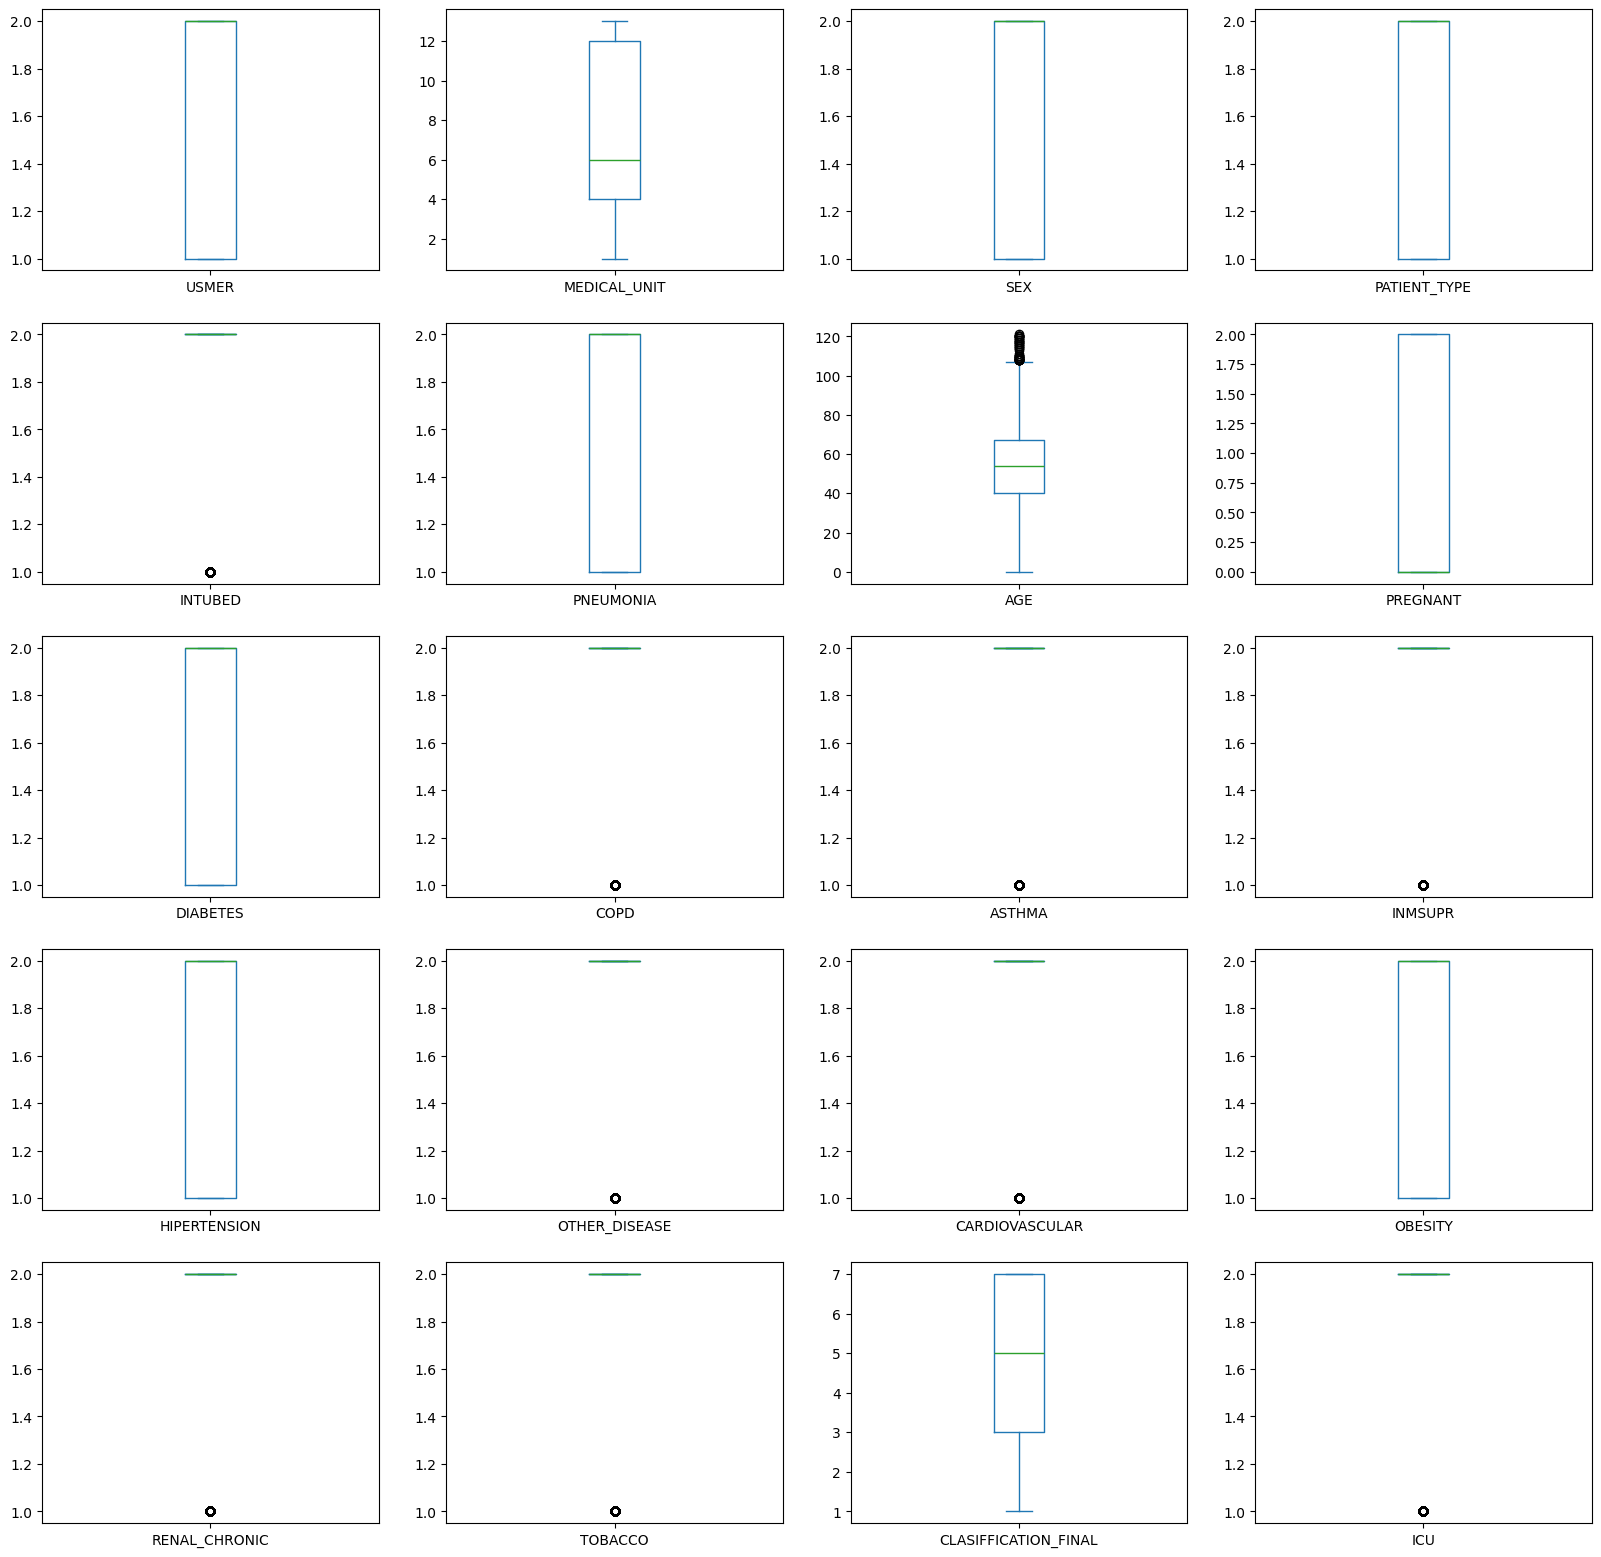

In [195]:
columns = COVID.columns
# TODO using not cleaned up version
axes = COVID[columns].plot (
    kind='box',
    subplots=True,
    layout=(10,4),
    figsize=(20,40)
)
plt.show()

In [196]:
for col in COVID.select_dtypes(include=['number']).columns:
    Q1 = COVID[col].quantile(0.20)
    Q3 = COVID[col].quantile(0.80)
    IQR = Q3 - Q1

    COVID = COVID[(COVID[col] >= Q1 - 1.5 * IQR) & (COVID[col] <= Q3 + 1.5 * IQR)]

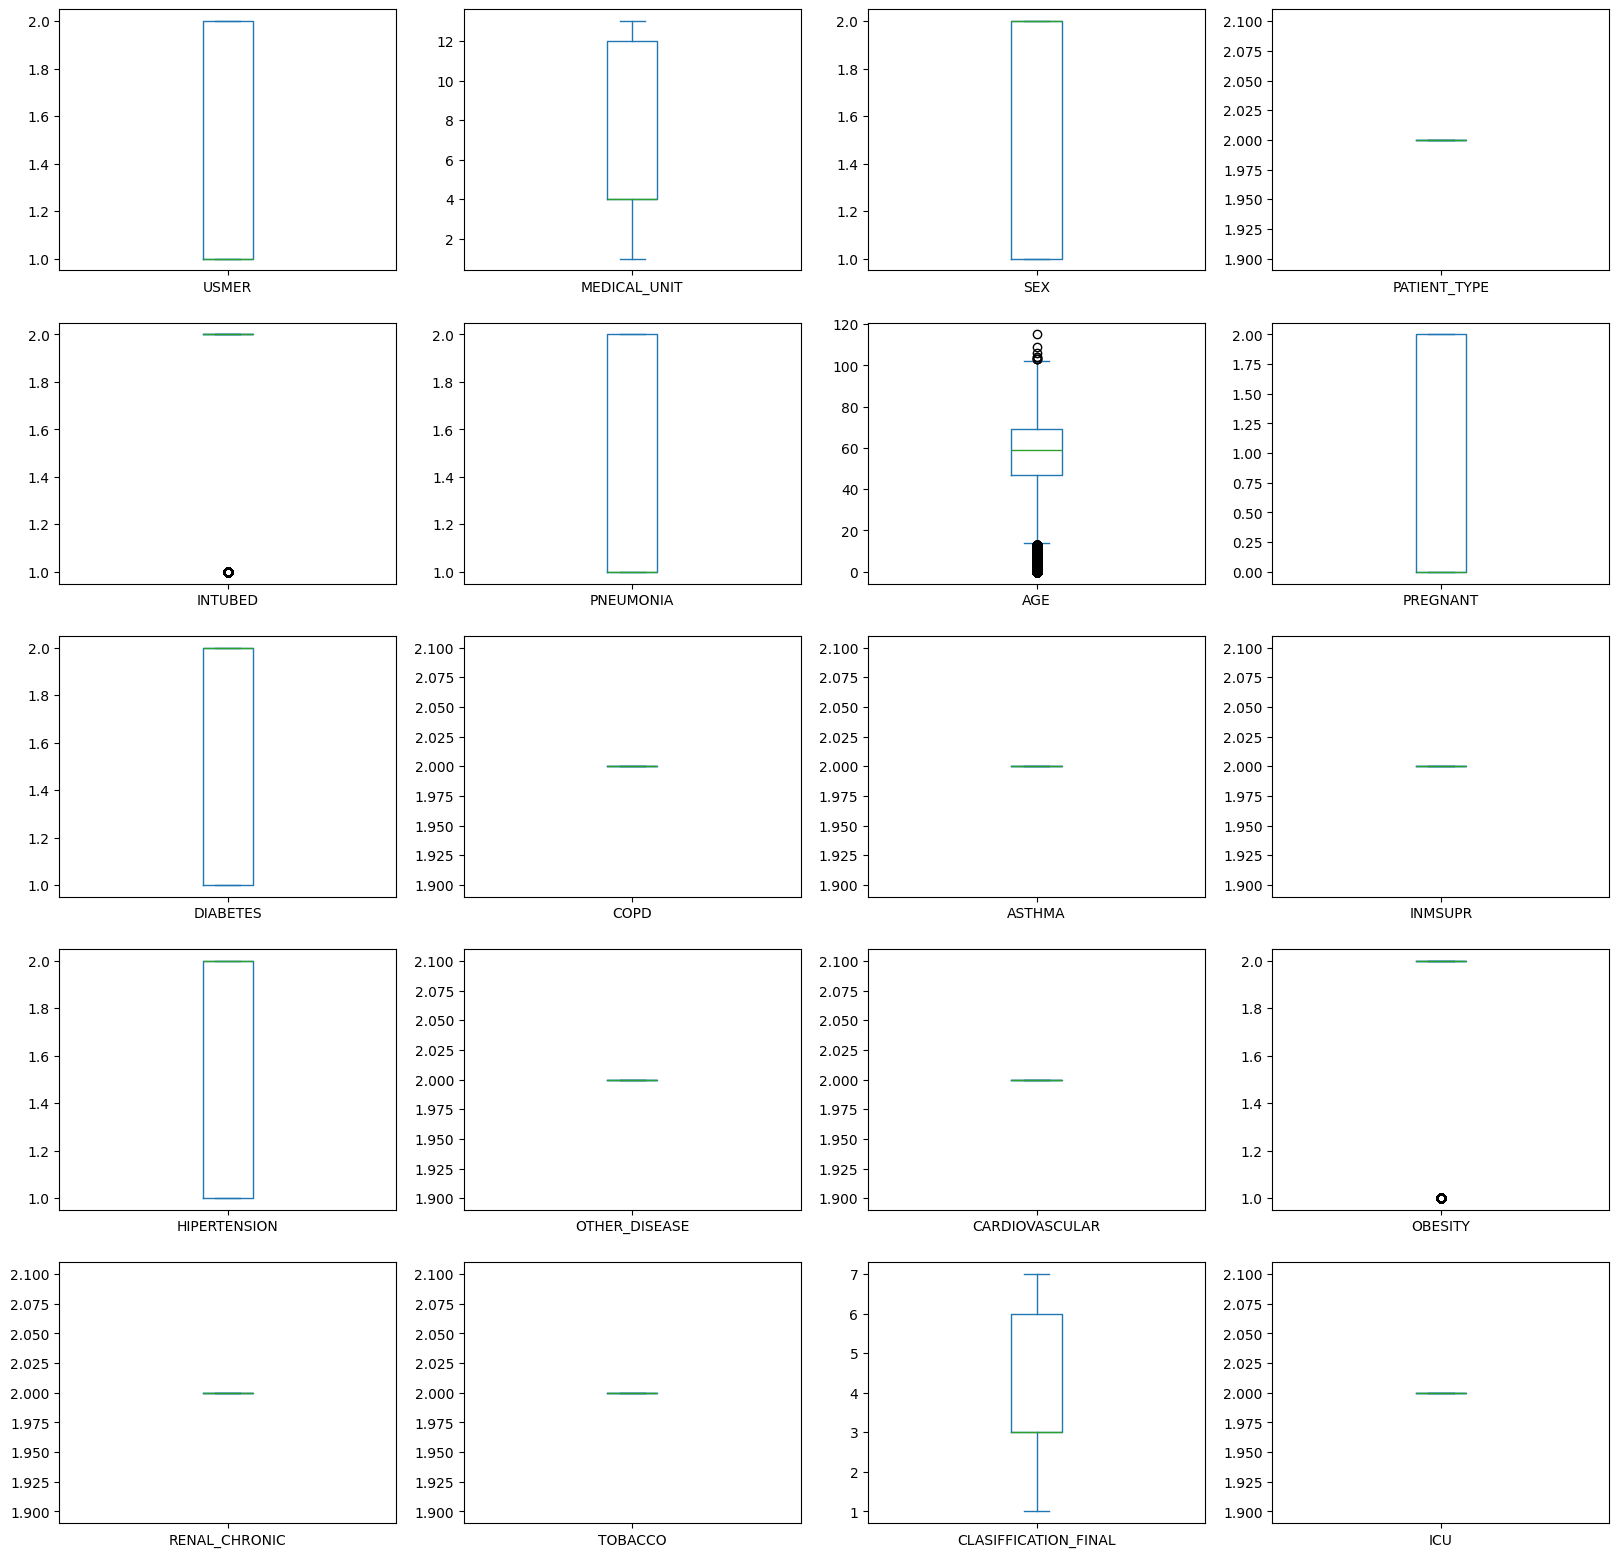

In [197]:
axes = COVID[columns].plot (
    kind='box',
    subplots=True,
    layout=(10,4),
    figsize=(20,40)
)
plt.show()

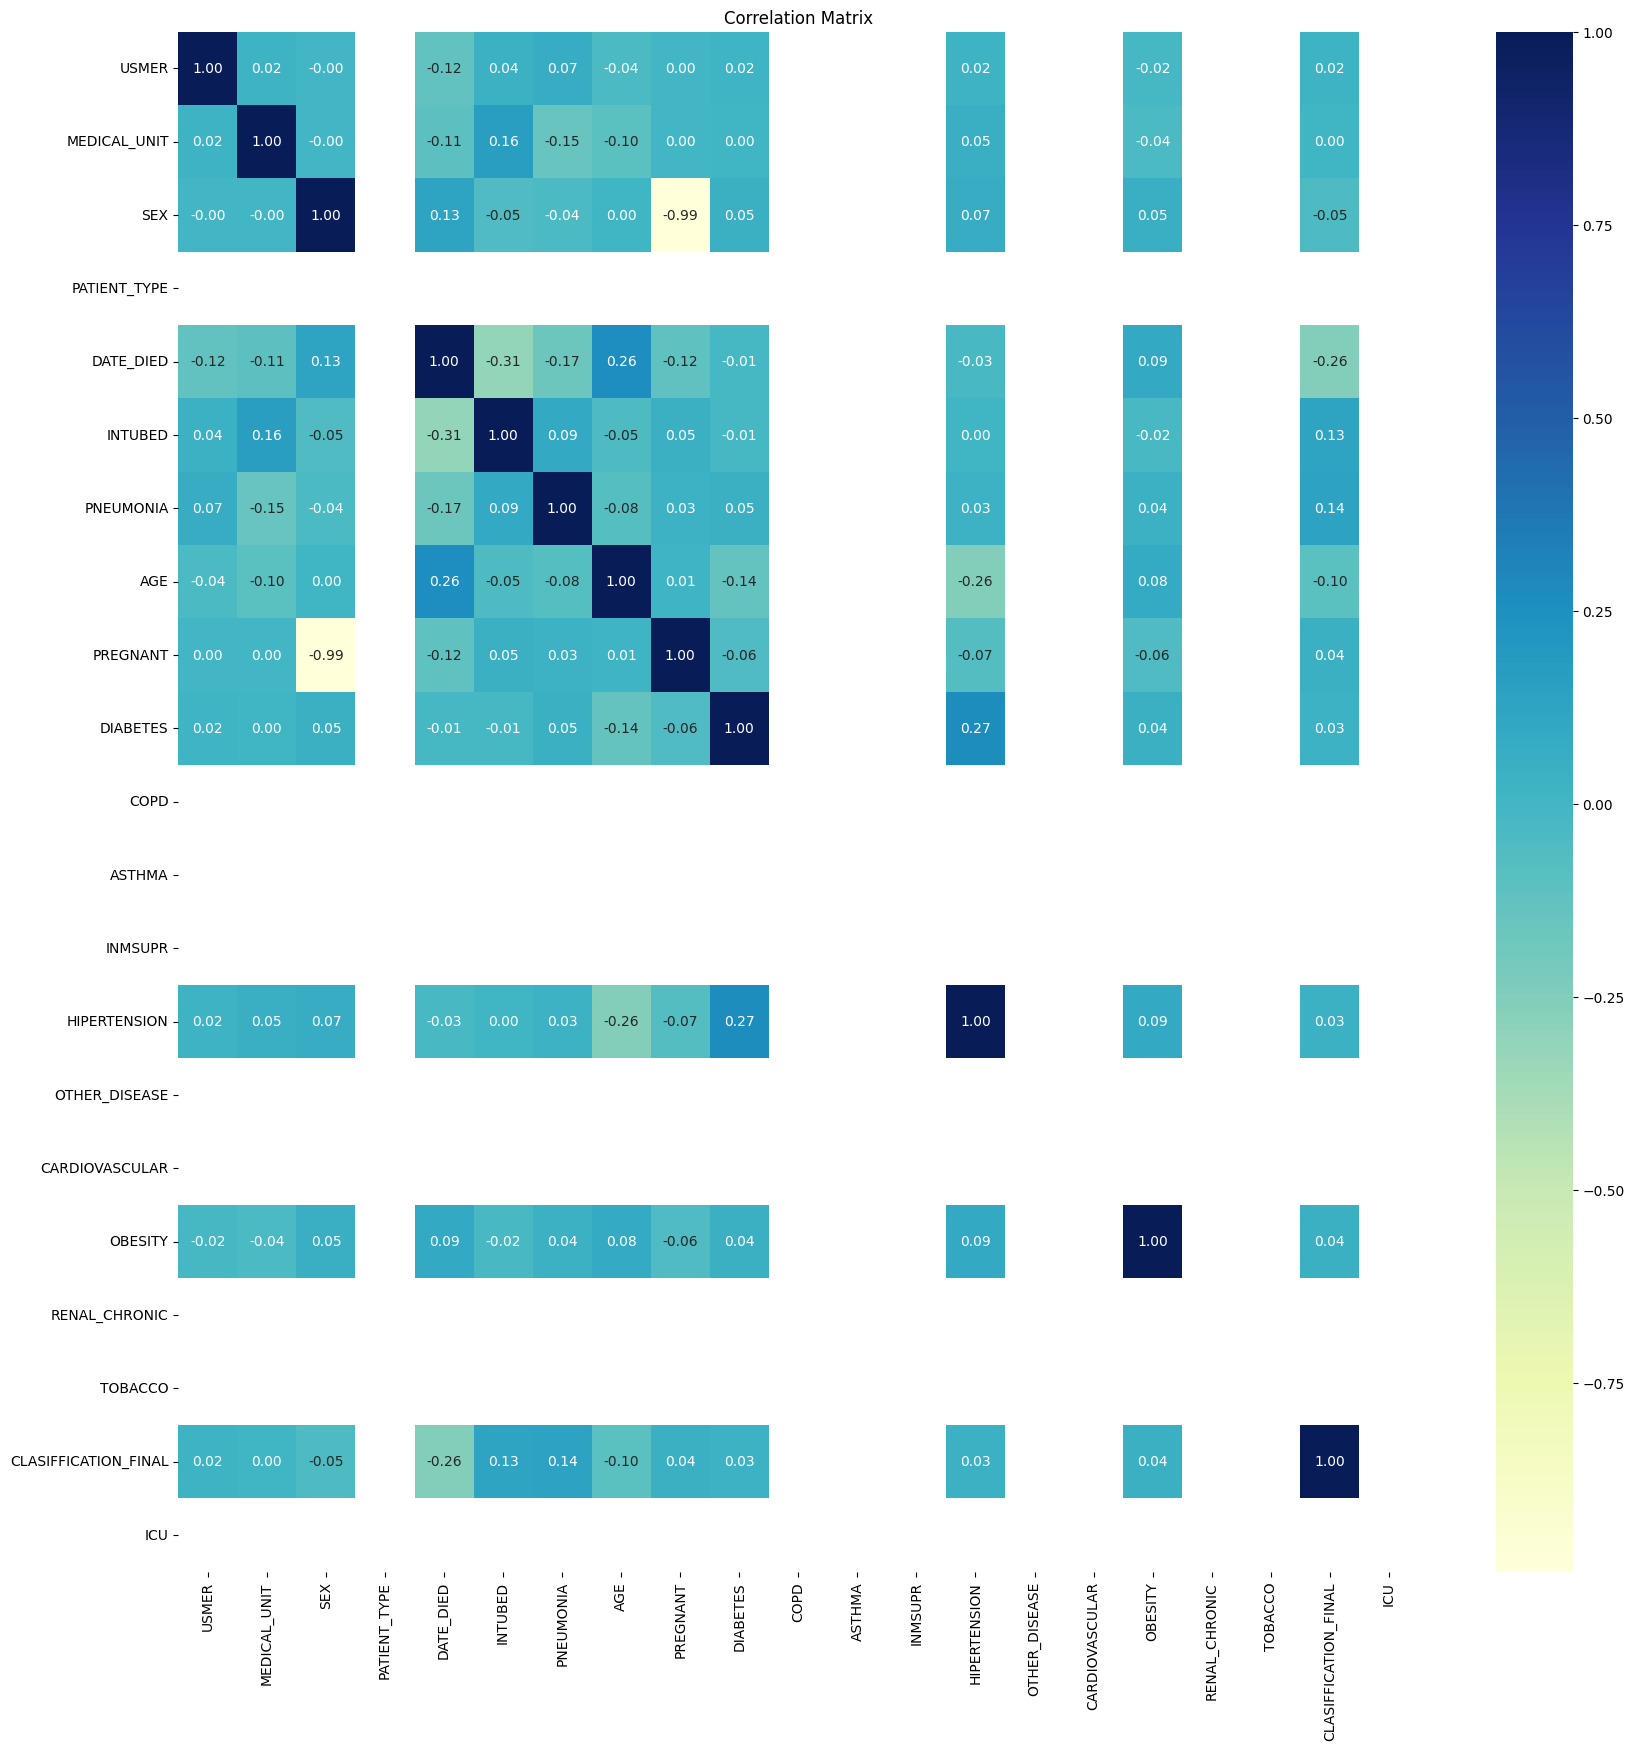

In [198]:
corr_mat = COVID.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

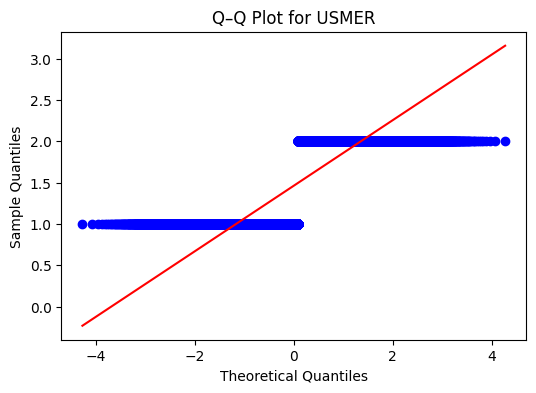

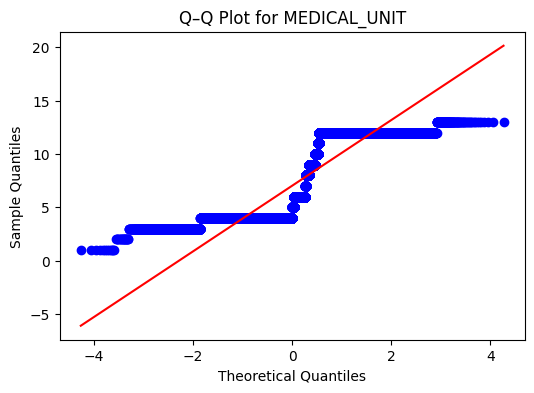

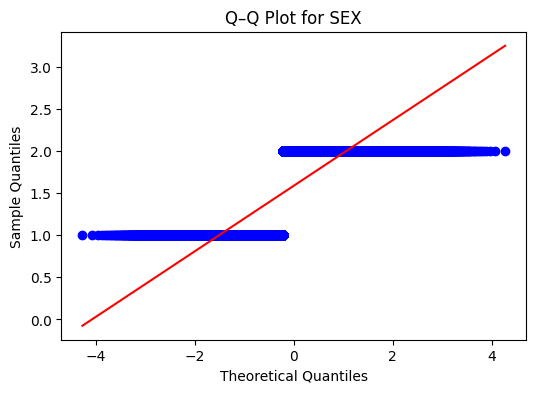

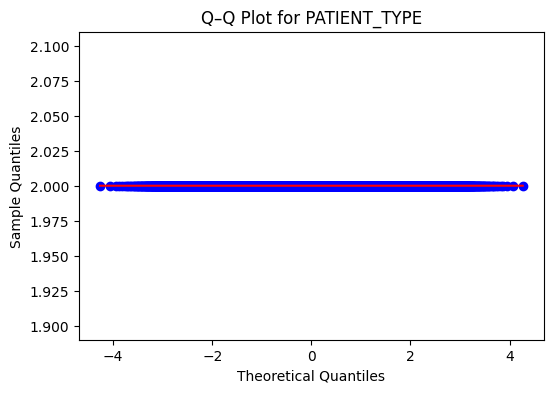

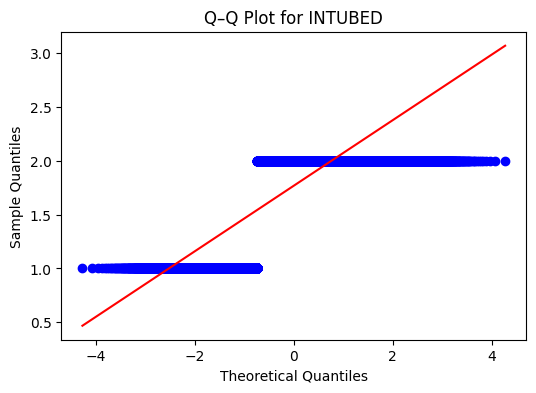

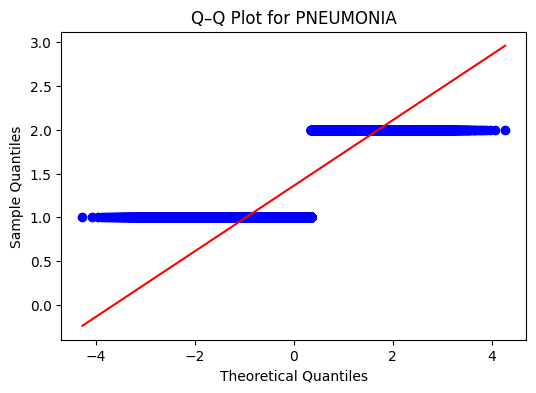

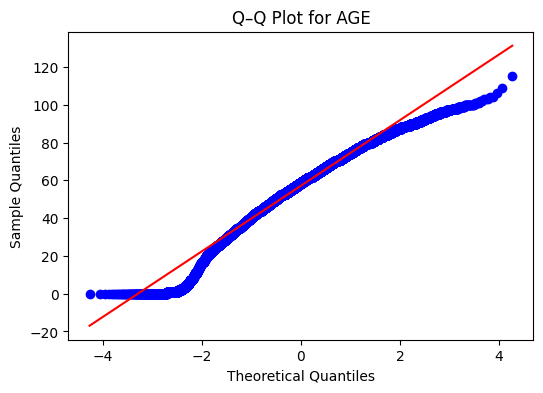

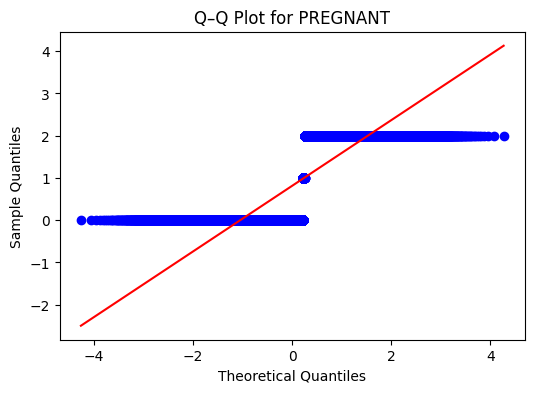

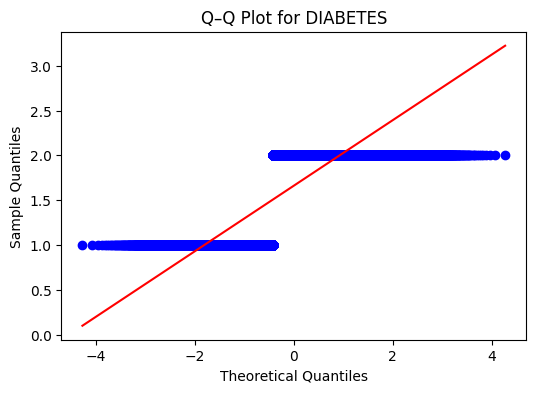

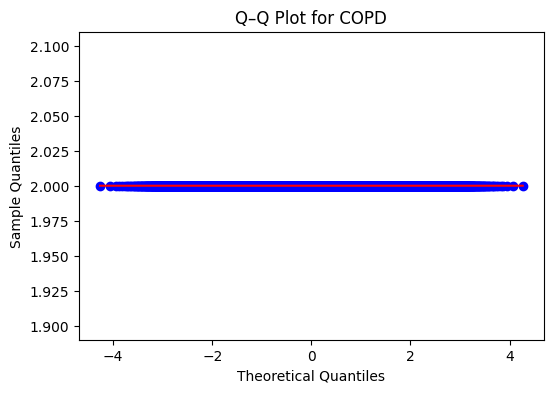

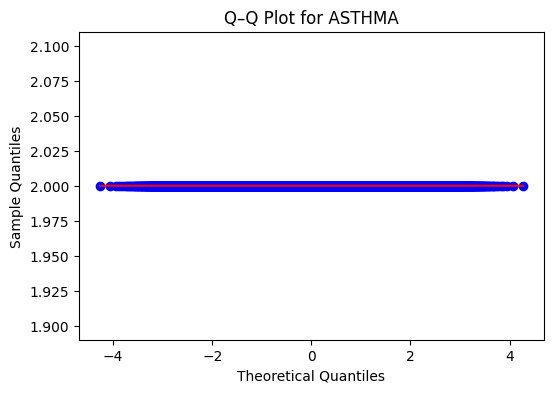

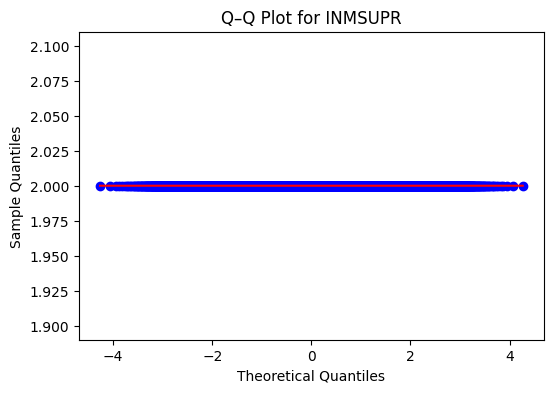

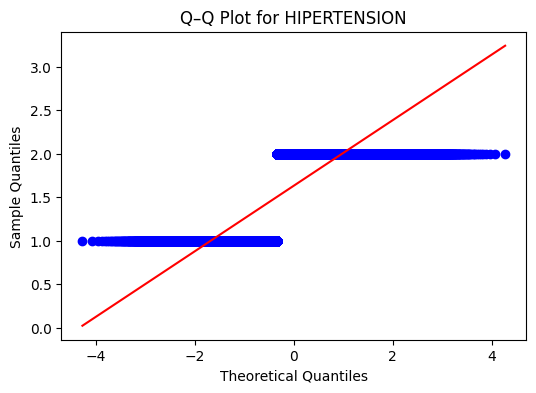

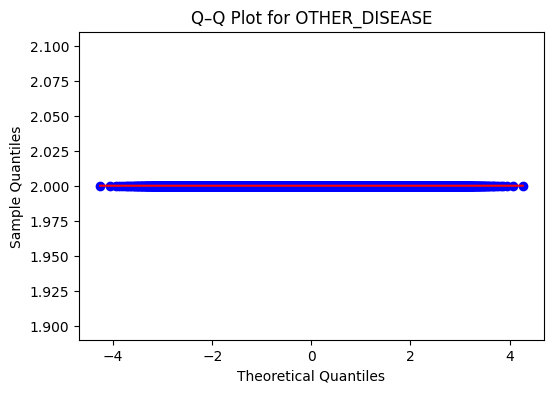

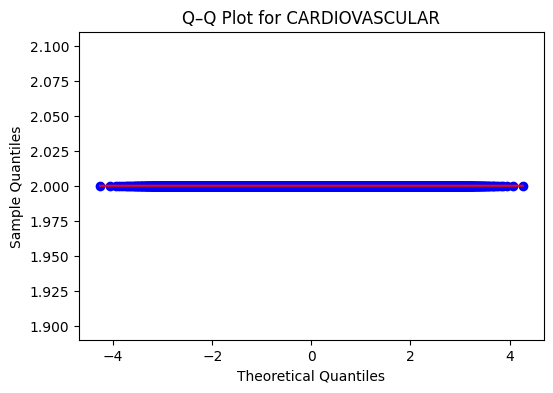

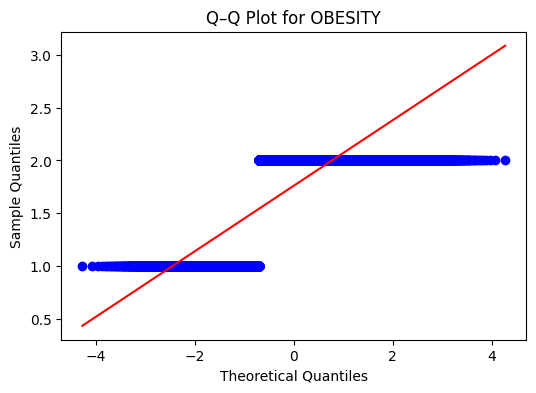

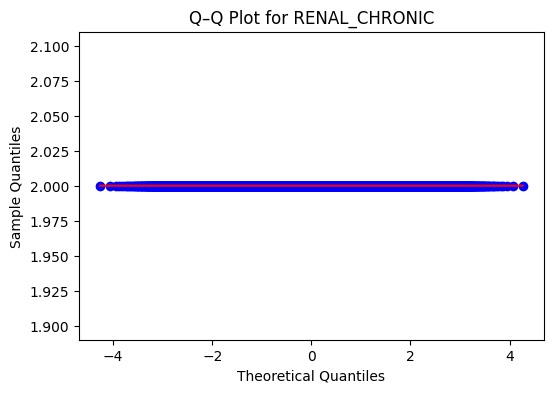

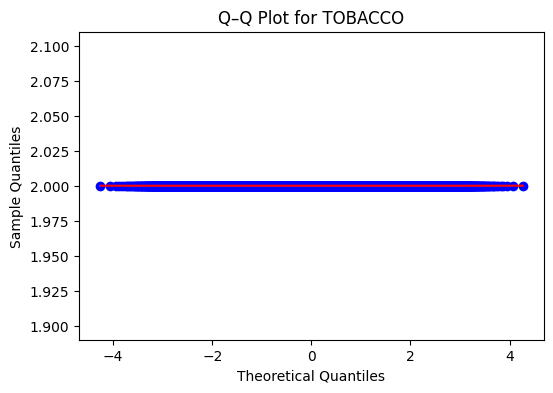

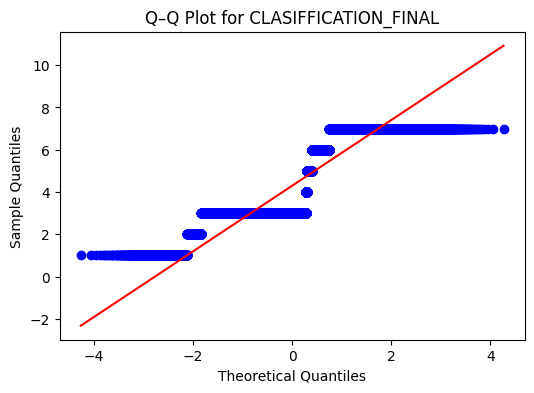

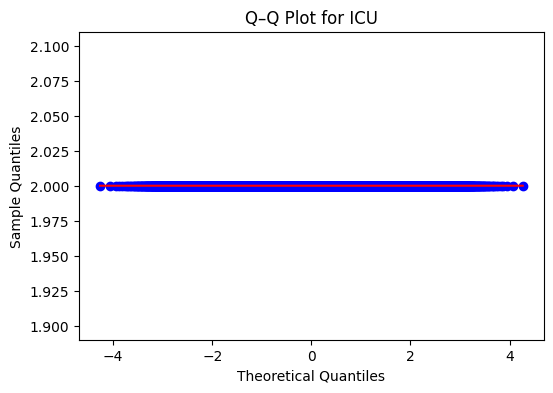

In [199]:
for col in COVID.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(COVID[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q–Q Plot for {col}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.show()